# MATH 360 Python Assignment 1

* See [Mathematical Python](https://patrickwalls.github.io/mathematicalpython/) for an introduction to Python and Jupyter
* See [Introduction to Mathematical Modelling](https://ubcmath.github.io/MATH360/) for more examples
* Write solutions in the cells with `YOUR CODE HERE`
* Do **not** import any packages (other than the standard packages in the cell below)
* Run the tests to verify your solutions
* There are **hidden tests** therefore your solutions may not be entirely correct even if they pass the tests below
* Submit your `.ipynb` notebook file to Canvas (download from Syzygy to your machine and upload to Canvas)

In [1]:
import numpy as np
import scipy.linalg as la
import scipy.integrate as spi
import matplotlib.pyplot as plt

## Problem 1

See [Mathematical Python > Differential Equations](https://patrickwalls.github.io/mathematicalpython/differential-equations/first-order/) to review how to use the function `scipy.integrate.odeint` to approximate solutions of differential equations. Consider a first order scalar equation with an initial condition:

$$
y' = f(y,t) \ \ , \ y(t_0) = y_0
$$

Note that we represent the right-hand side of the equation as a function $f(y,t)$ where the unknown function $y(t)$ is the first parameter in the function. This is the order that `odeint` expects.

### Part 1a (3 marks)

Consider the equation $y' = t^2 - y^2$, $y(0) = 1$. Write a function called `f1a` which represents the right hand side of the equation.

In [2]:
# YOUR CODE HERE
f1a = lambda y, t: t**2 - y**2

In [3]:
# Test 1: Verify f1a is a Python function which takes two input parameters. (1 mark)
assert callable(f1a) , "f1a should be a Python function."
assert f1a(1,2) > 0 , "f1a(1,2) should return a positive number."
print("Test 1: Success!")

Test 1: Success!


In [4]:
# Test 2: Verify f1a(1,2) = 3 and f1a(3,-2) = -5. (1 mark)
assert abs(f1a(1,2) - 3) < 1e-14 , "Value f1a(1,2) should be 3."
assert abs(f1a(3,-2) + 5) < 1e-14 , "Value f1a(3,-2) should be -5."
print("Test 2: Success!")

Test 2: Success!


In [5]:
# Test 3: Verify f1a returns the correct values. This cell contains hidden tests. (1 mark)

### Part 1b (3 marks)

Use the function `odeint` to approximate the solution of the equation $y' = t^2 - y^2$, $y(0) = 1$, over the interval $[0,2]$ using 101 equally spaced points from 0 to 2. Save the result as `y1b`.

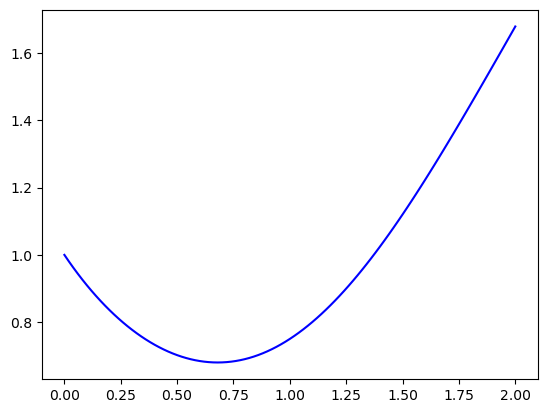

In [6]:
# YOUR CODE HERE
y0 = 1 
T = np.linspace(0,2, 101)
y1b = spi.odeint(f1a, y0, T)
plt.plot(T, y1b, 'b-')

In [7]:
# Test 1: Verify y1b is a NumPy array of length 101. (1 mark)
assert isinstance(y1b,np.ndarray) , "y1b should be a NumPy array."
assert len(y1b) == 101 , "y1b should have length 101."
print("Test 1: Success!")

Test 1: Success!


In [8]:
# Test 2: Verify values at t=0 and t=2. (1 mark)
assert abs(y1b[0] - 1.0) < 1e-14 , "Value y1b[0] should be 1."
assert abs(y1b[-1] - 1.6794589163875036) < 1e-14 , "Value y1b[-1] should be approximately 1.6794589."
print("Test 2: Success!")

Test 2: Success!


In [9]:
# Test 3: Verify y1b has the correct values. This cell contains hidden tests. (1 mark)

Plot the result:

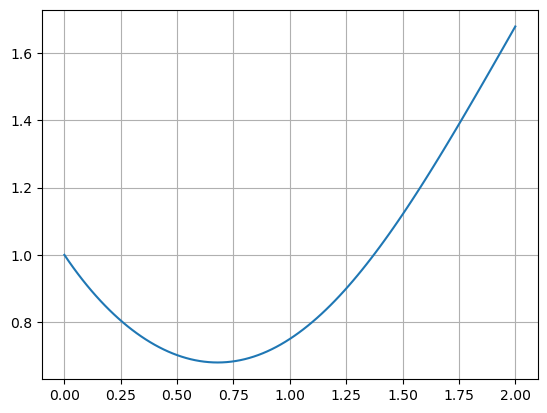

In [10]:
x1b = np.linspace(0,2,101)
plt.plot(x1b,y1b)
plt.grid(True)
plt.show()

## Problem 2

Consider the second order differential equaton:

$$
t^2 x'' + t x' + (t^2 - 1)x = 0
$$

### Part 2a (3 marks)

Convert the equation into a first order system with new variables $u_0 = x$ and $u_1 = x'$. Write a Python function called `f2a` to represent the right hand side of the system

$$
\frac{d \mathbf{u}}{dt} = \mathbf{f}(\mathbf{u},t)
$$

where $\mathbf{u} = [u_0,u_1]$.

In [11]:
# YOUR CODE HERE
def f2a(u, t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = -1/t*u[1] - (1-1/t**2)*u[0]
    return dudt


In [12]:
# Test 1: Verify f2a is a Python function which takes two input parameters and returns an array. (1 mark)
assert callable(f2a) , "f2a should be a Python function."
assert len(f2a([0,1],1)) == 2 , "f2a should return an array of length 2."
print("Test 1: Success!")

Test 1: Success!


In [13]:
# Test 2: Verify values at x=1, x'=0 and t=1. (1 mark)
assert np.allclose(f2a([0,1],1),[1,-1]) , "f2a([0,1],1) should return array [1,-1]."
print("Test 2: Success!")

Test 2: Success!


In [14]:
# Test 3: Verify f2a returns the correct values. This cell contains hidden tests. (1 mark)

### Part 2b (3 marks)

Use the function `odeint` to approximate the solution $x(t)$ of the equation

$$
t^2 x'' + t x' + (t^2 - 1)x = 0 , \ x(1) = 1 , \ x'(1) = 0
$$

over the interval $[1,11]$ using 501 equally spaced points from 1 to 11. Save the result as `x2b`.

In [15]:
# YOUR CODE HERE
u0 = [1.,0.] # initial conditions: x(1)=1, x'(1)=0
t=np.linspace(1,11, 501)
x2b_full= spi.odeint(f2a, u0, t)

x2b=x2b_full[:,0] # force passing the test but idk if the correct method

In [16]:
# Test 1: Verify x2b is a NumPy array of length 501. (1 mark)
assert isinstance(x2b,np.ndarray) , "x2b should be a NumPy array."
assert len(x2b) == 501 , "x2b should have length 501."
print("Test 1: Success!")

Test 1: Success!


In [17]:
# Test 2: Verify values at t=1 and t=11. (1 mark)
assert abs(x2b[0] - 1.0) < 1e-14 , "Value x2b[0] should be 1."
assert abs(x2b[-1] + 0.32505727130105394) < 1e-14 , "Value x2b[-1] should be approximately -0.32505727130105394."
print("Test 2: Success!")

Test 2: Success!


In [18]:
# Test 3: Verify x2b has the correct values. This cell contains hidden tests. (1 mark)

Plot the result:

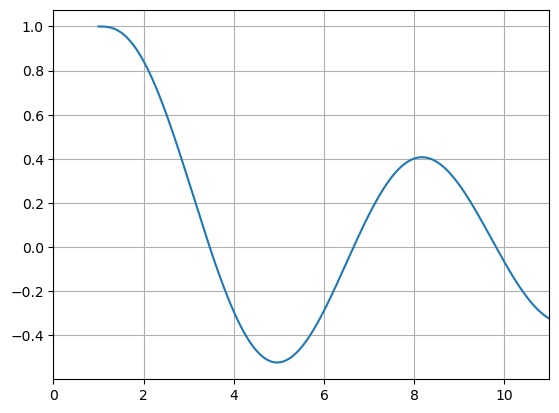

In [19]:
t = np.linspace(1,11,501)
plt.plot(t,x2b), plt.xlim([0,11]), plt.grid(True)
plt.show()

## Problem 3

Consider the first order system of differential equations:

$$
\begin{align*}
x_0' &= x_0 x_1 - 3x_2 \\
x_1' &= -x_0 x_1 + 2x_2 \\
x_2' &= x_0 x_1 - 2.25x_2
\end{align*}
$$

### Part 3a

Write a Python function called `f3a` to represent the right hand side of the system

$$
\frac{d \mathbf{x}}{dt} = \mathbf{f}(\mathbf{x},t)
$$

where $\mathbf{x} = [x_0,x_1,x_2]$.

In [20]:
# YOUR CODE HERE
def f3a(x , t):
    dxdt = np.zeros(3)
    dxdt[0] = x[0]*x[1] - 3*x[2]
    dxdt[1] = -x[0]*x[1] + 2*x[2]
    dxdt[2] = x[0]*x[1] - 2.25*x[2]
    return dxdt

In [21]:
# Test 1: Verify f3a is a Python function which takes two input parameters and returns an array. (1 mark)
assert callable(f3a) , "f2a should be a Python function."
assert len(f3a([1,1,1],1)) == 3 , "f3a should return an array of length 3."
print("Test 1: Success!")

Test 1: Success!


In [22]:
# Test 2: Verify values at x0=x1=x2=1 and t=1. (1 mark)
assert np.allclose(f3a([1,1,1],1),[-2,1,-1.25]) , "f3a([1,1,1],1) should return the array [-2,1,-1.25]."
print("Test 2: Success!")

Test 2: Success!


In [23]:
# Test 3: Verify f3a returns the correct values. This cell contains hidden tests. (1 mark)

### Part 3b (3 marks)

Use the function `odeint` to approximate the solution $\mathbf{x}(t)$ of the system above with initial values $x_0(0) = x_1(0) = x_2(0) = 1$. Approximate the solution over the interval $[0,10]$ using 501 equally spaced points from 0 to 10. Save the result as `x3b` (a NumPy array of size 501 by 3).

In [24]:
# YOUR CODE HERE
x0 = [1., 1., 1.]
t = np.linspace(0,10, 501) 
x3b = spi.odeint(f3a, x0, t)

In [25]:
# Test 1: Verify x3b is a NumPy array of size 501 by 3. (1 mark)
assert isinstance(x3b,np.ndarray) , "x3b should be a NumPy array."
assert x3b.shape == (501,3) , "x3b should have shape (501,3)."
print("Test 1: Success!")

Test 1: Success!


In [26]:
# Test 2: Verify values at t=0 and t=10. (1 mark)
assert np.allclose(x3b[0,:],[1,1,1]) , "Value x3b[0,:] should be the intial values [1,1,1]."
assert np.allclose(x3b[-1,:],[0.39684616, 1.76721871, 0.27379751]) , "Value x2b[-1,:] should be approximately [0.40, 1.77, 0.27]."
print("Test 2: Success!")

Test 2: Success!


In [27]:
# Test 3: Verify x3b has the correct values. This cell contains hidden tests. (1 mark)

Plot the results:

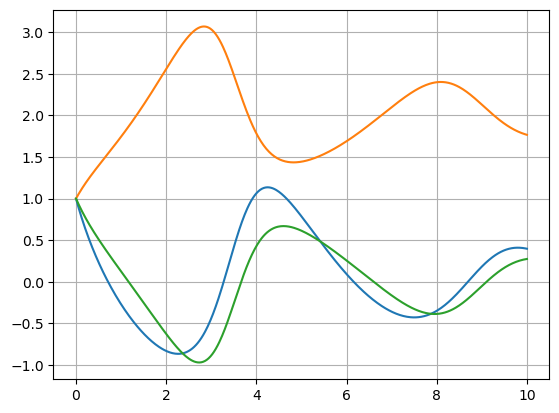

In [28]:
t = np.linspace(0,10,501)
plt.plot(t,x3b), plt.grid(True)
plt.show()

## Problem 4 (3 marks)

Consider the system of equations

$$
\begin{align*}
u_0' &= u_0 u_1 - u_1^2 \\
u_1' &= u_0 u_1 - c u_0^2
\end{align*}
$$

where $c$ is a parameter such that $c \ne 1$. There is only one steady state solution $(0,0)$ for any $c \ne 1$ and the Jacobian is the zero matrix therefore we cannot use linearization to classify the steady state. Plot several trajectories for different initial conditions and different values of the parameter $c$. Find values $a$ and $b$ defining an interval such that if $c \in (a,b)$ then $u_0(t) \to 0$ and $u_1(t) \to 0$ as $t \to \infty$ for any initial conditions. Save the values $a$ and $b$ as `a4` and `b4` respectively.

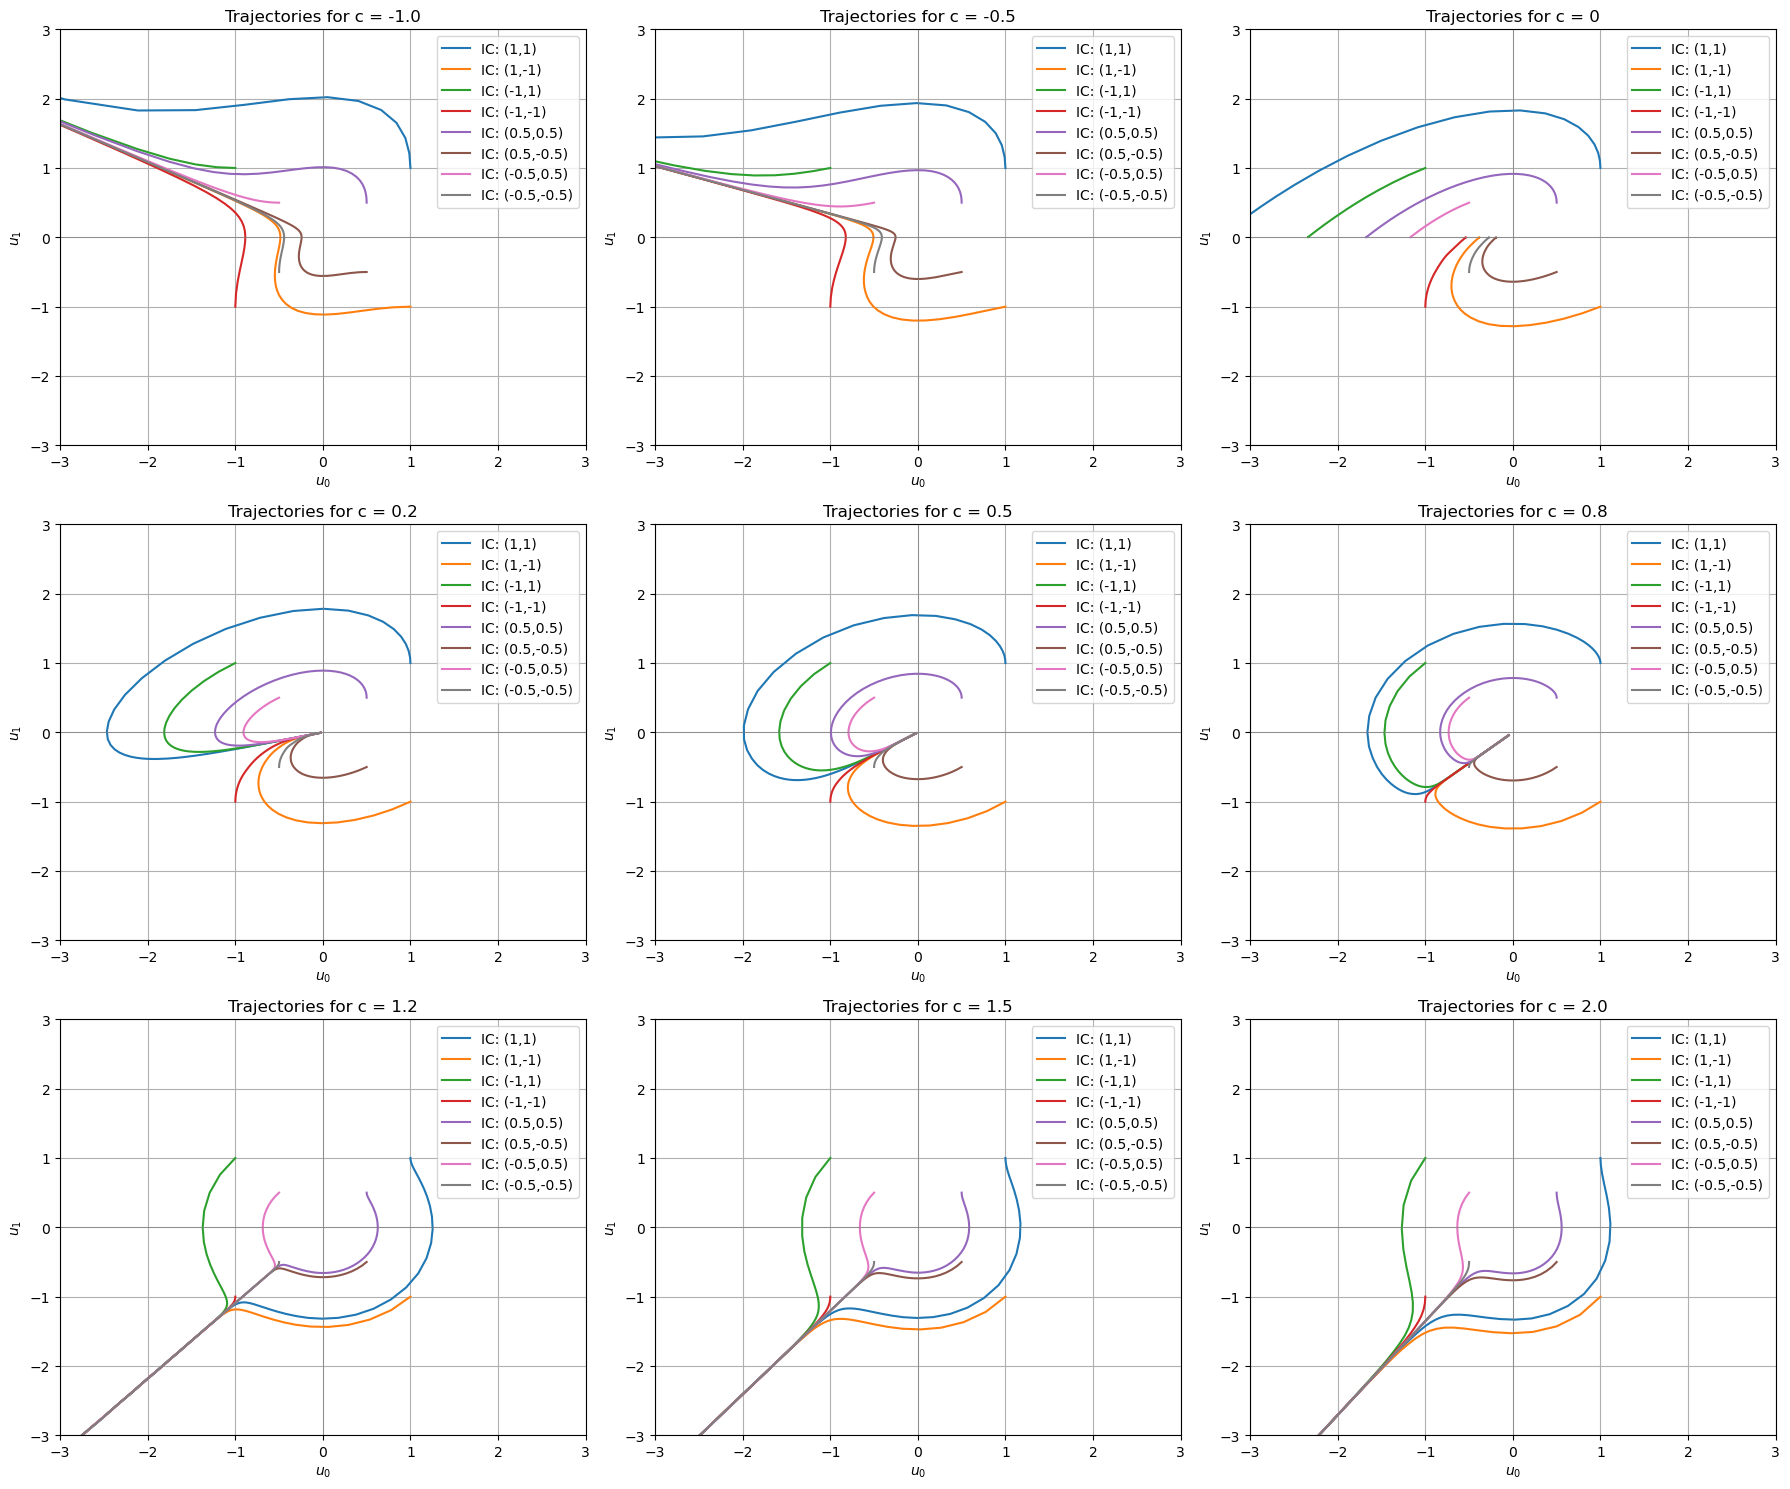

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000000

# function definition
def f(t,u,c):
    dudt = np.zeros(2)
    dudt[0] = u[0]*u[1] - u[1]**2
    dudt[1] = u[0]*u[1] - c*u[0]**2
    return dudt

t = np.linspace(0, 200, 2000)

initial_conditions = [
    [1, 1], [1, -1], [-1, 1], [-1, -1],
    [0.5, 0.5], [0.5, -0.5], [-0.5, 0.5], [-0.5, -0.5],
]

# Parameter values to test <- this range was found through trial and error, started with [-1., 0., 1., 2., 3., 4.] and shortened the list from there
c_values = [-1.0, -0.5, 0, 0.2, 0.5, 0.8, 1.2, 1.5, 2.0] 

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
axs = axs.flatten()

# Loop over each c value and plot trajectories for different initial conditions
for i, c in enumerate(c_values):
    ax = axs[i]
    for u0_0, u1_0 in initial_conditions:
        sol = spi.solve_ivp(f, [t[0], t[-1]], [u0_0, u1_0], args=(c,), t_eval=t)  # using solve_ivp since odeint had overflow issues
        ax.plot(sol.y[0], sol.y[1], label=f'IC: ({u0_0},{u1_0})')
    ax.legend()
    ax.set_title(f'Trajectories for c = {c}')
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_xlabel('$u_0$')
    ax.set_ylabel('$u_1$')
    ax.grid(True)
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)

plt.tight_layout()
plt.show()


In [30]:
# For c < 1 the solutions all seem to converge to the origin (0,0). For c > 1, the solutions diverge away from the origin. Therefore an interval might be (0,1).

a4 = 0
b4 = 1

In [31]:
# Test 1: Verify a4 and b4 are numeric types. (1 mark)
assert isinstance(a4,(int,float))
assert isinstance(b4,(int,float))
print("Test 1: Success!")

Test 1: Success!


In [32]:
# Test 2: Verify a4 is the correct value. This cell contains hidden tests. (1 mark)

In [33]:
# Test 3: Verify b4 is the correct value. This cell contains hidden tests. (1 mark)